In [11]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero

# valeurs de Z1 et Z2
Z1 = True
Z2 = True

# création des listes pour stocker les coordonnées (NTtoD, Fscore)
#std
db = "Chalearn"
path = f"C:\workspace2\Datasets/{db}/expOut/"

def getFScoreAndNTtoDoFor(doSSG, useSG,wCTC=0.9,smooth=10,deltaIoU=0.0, vox=4,cudi=3,split=200,onlyConverged=False):
    nttod_fscore_list = []
   # parcours des fichiers
    for x in range(0, 11):
        # construction du nom de fichier
        onlyConvergedStr = "_convergedOnly" if onlyConverged else ""
        filename = f"vox{str(vox)}_cuDi{cudi}_wCTC{wCTC}_smooth{str(smooth)}_SSG{str(doSSG)}_wprior{x / 10.0:.1f}_useSG{str(useSG)}_split{str(split)}{onlyConvergedStr}/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_{str(deltaIoU)}.txt"

        if onlyConverged and not os.path.exists(path+filename):
            filename = f"vox{str(vox)}_cuDi{cudi}_wCTC{wCTC}_smooth{str(smooth)}_SSG{str(doSSG)}_wprior{x / 10.0:.1f}_useSG{str(useSG)}_split{str(split)}/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_{str(deltaIoU)}.txt"
            print("Only converged does not exist for wprior",x," used normal one")
        # vérification si le fichier existe
        if os.path.exists(path+filename):
            # ouverture du fichier en mode lecture
            with open(path+filename, "r") as f:
                # parcours des lignes
                for line in f:
                    # recherche des scores Fscore et NTtoD
                    if "FScore:" in line:
                        vals = line.split()
                        fscore = float(vals[1])
                        stdFscore = float(vals[-1])
                    if "Precision:" in line:
                        vals = line.split()
                        precision = float(vals[1])
                        stdPrecision = float(vals[-1])
                    if "Recall:" in line:
                        vals = line.split()
                        recall = float(vals[1])
                        stdRecall = float(vals[-1])
                    elif "NTtoD:" in line:
                        vals = line.split()
                        nttod = float(vals[1])
                        stdNTtoD = float(vals[-1])
                # ajout des coordonnées à la liste correspondante
                nttod_fscore_list.append((nttod, stdNTtoD,fscore, stdFscore,x/10.0,precision,stdPrecision,recall,stdRecall))
        else:
            # print(f"Le fichier {filename} n'existe pas.")
            pass
    return nttod_fscore_list

def prettyPrintForLatexIntegration(nttod_fscore_list):
    #if nttod_fscore_list is a list
    if isinstance(nttod_fscore_list, list):
        for  nttod, stdNTtoD,fscore, stdFscore,wprior,precision,stdPrecision,recall,stdRecall in nttod_fscore_list:
            print(f" {wprior} & ${fscore*100:.1f} \pm {stdFscore*100:.1f}$ & ${precision*100:.1f} \pm {stdPrecision*100:.1f}$ & ${recall*100:.1f} \pm {stdRecall*100:.1f}$ & ${nttod*100:.1f} \pm {stdNTtoD*100:.1f}$ \\\\")
    else:
        nttod, stdNTtoD,fscore, stdFscore = nttod_fscore_list
        print(f" {fscore*100:.1f} \pm {stdFscore*100:.1f} & {nttod*100:.1f} \pm {stdNTtoD*100:.1f} \\\\")


In [12]:
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True)
prettyPrintForLatexIntegration(nttod_fscore_list)

 0.0 & $81.4 \pm 0.7$ & $91.7 \pm 1.4$ & $73.3 \pm 1.7$ & $51.9 \pm 0.7$ \\
 0.1 & $81.9 \pm 0.4$ & $86.0 \pm 2.3$ & $78.3 \pm 2.2$ & $39.6 \pm 1.2$ \\
 0.2 & $78.1 \pm 1.3$ & $77.2 \pm 2.9$ & $79.2 \pm 0.8$ & $34.6 \pm 0.9$ \\
 0.3 & $72.2 \pm 1.2$ & $67.8 \pm 3.0$ & $77.4 \pm 1.4$ & $31.0 \pm 0.8$ \\
 0.4 & $66.5 \pm 2.1$ & $59.2 \pm 2.7$ & $75.8 \pm 1.2$ & $29.4 \pm 0.9$ \\
 0.5 & $61.5 \pm 0.9$ & $52.4 \pm 1.1$ & $74.4 \pm 0.5$ & $27.3 \pm 0.4$ \\
 0.6 & $56.0 \pm 1.6$ & $46.2 \pm 2.1$ & $71.1 \pm 0.5$ & $26.2 \pm 0.5$ \\
 0.7 & $54.3 \pm 1.1$ & $44.6 \pm 1.3$ & $69.4 \pm 1.1$ & $25.3 \pm 0.7$ \\
 0.8 & $51.6 \pm 1.7$ & $41.3 \pm 1.8$ & $68.5 \pm 0.9$ & $24.6 \pm 0.2$ \\
 0.9 & $47.3 \pm 1.9$ & $36.8 \pm 2.1$ & $65.9 \pm 1.4$ & $23.7 \pm 0.5$ \\
 1.0 & $46.5 \pm 1.7$ & $36.3 \pm 1.7$ & $64.8 \pm 1.1$ & $23.3 \pm 0.6$ \\


In [13]:
nttod_fscore_list = getFScoreAndNTtoDoFor(True, False,wCTC=1,smooth=0,onlyConverged=True)
prettyPrintForLatexIntegration(nttod_fscore_list)

Only converged does not exist for wprior 4  used normal one
Only converged does not exist for wprior 5  used normal one
Only converged does not exist for wprior 6  used normal one
Only converged does not exist for wprior 7  used normal one
Only converged does not exist for wprior 8  used normal one
 0.0 & $79.3 \pm 2.2$ & $81.6 \pm 2.0$ & $77.2 \pm 2.7$ & $61.0 \pm 4.1$ \\
 0.1 & $63.5 \pm 2.7$ & $66.0 \pm 3.3$ & $61.2 \pm 2.2$ & $50.6 \pm 0.7$ \\
 0.2 & $39.1 \pm 4.7$ & $39.4 \pm 5.5$ & $38.8 \pm 3.9$ & $50.8 \pm 1.7$ \\
 0.3 & $26.2 \pm 0.0$ & $25.8 \pm 0.0$ & $26.6 \pm 0.0$ & $49.4 \pm 0.0$ \\
 0.4 & $0.4 \pm 0.1$ & $1.5 \pm 0.6$ & $0.3 \pm 0.1$ & $14.8 \pm 8.7$ \\
 0.5 & $0.8 \pm 0.2$ & $1.4 \pm 0.4$ & $0.6 \pm 0.2$ & $11.4 \pm 6.8$ \\
 0.6 & $1.1 \pm 0.2$ & $1.6 \pm 0.4$ & $0.8 \pm 0.2$ & $9.9 \pm 4.8$ \\
 0.7 & $1.1 \pm 0.2$ & $2.0 \pm 1.2$ & $0.8 \pm 0.1$ & $13.3 \pm 2.6$ \\
 0.8 & $1.2 \pm 0.1$ & $1.7 \pm 0.5$ & $1.0 \pm 0.2$ & $9.4 \pm 3.4$ \\
 0.9 & $24.5 \pm 0.0$ & $19.8 \pm

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Only converged does not exist for wprior 4  used normal one
Only converged does not exist for wprior 5  used normal one
Only converged does not exist for wprior 6  used normal one
Only converged does not exist for wprior 7  used normal one
Only converged does not exist for wprior 8  used normal one


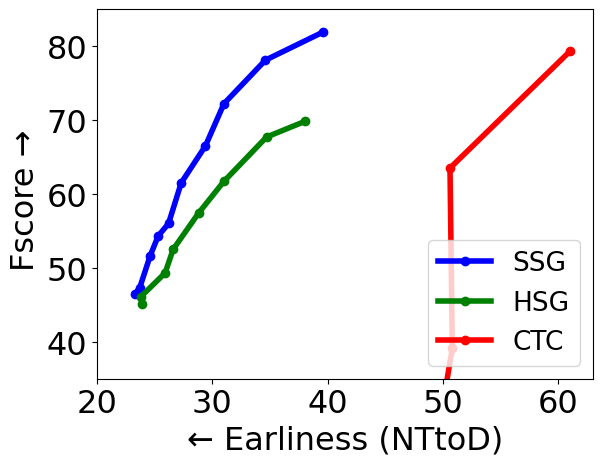

In [32]:


# création de la figure
plt.figure()
# ax = SubplotZero(fig, 111)
# fig.add_subplot(ax)
# ax.axis['yzero'].set_axisline_style("-|>")

plt.rcParams.update({'font.size': 23})
# set the line width of plot higher
plt.rcParams['lines.linewidth'] = 4

# plt.grid(linestyle="-",linewidth=.4)
# min max
plt.xlim(20.0, 63.0)
plt.ylim(35.0, 85.0)

# ajout légendes des axes
plt.xlabel("← Earliness (NTtoD)")
plt.ylabel("Fscore → ")

# more labels on x axis
# plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

# nttod_list, fscore_list = getFScoreAndNTtoDoFor(doSSG=False, useSG=False)
# ax.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="CTC",  color='blue')

# ntto_d__fscore = getFScoreAndNTtoDoFor(True,True)
# ntto_d__fscore = sorted(ntto_d__fscore, key=lambda x: x[0][0])
# nttod_list, fscore_list = ntto_d__fscore
# plt.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="SSG",  color='orange')
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True)[1:]
# ntto_d__fscore = sorted(zip(ntto_d, fscore), key=lambda x: x[0][0])
plt.plot(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list)), label="SSG",  color='blue',marker="o")
# plt.plot(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list[1:2])), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list[1:2])),marker="x",markersize=10, color='yellow')

# plt.errorbar(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1],nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3],nttod_fscore_list)), linestyle='None')
# nttod_list, fscore_list = getFScoreAndNTtoDoFor(doSSG=False, useSG=True)
# plt.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="HSG",  color='green')
nttod_fscore_list = getFScoreAndNTtoDoFor(False, True)[3:]
# ntto_d__fscore = sorted(zip(ntto_d, fscore), key=lambda x: x[0][0])
plt.plot(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list)), label="HSG",  color='green',marker="o")
# plt.errorbar(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1],nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3],nttod_fscore_list)), linestyle='None')



nttod_fscore_list = getFScoreAndNTtoDoFor(True, False,wCTC=1,smooth=0,onlyConverged=True)
# ntto_d__fscore = sorted(zip(ntto_d, fscore), key=lambda x: x[0][0])
plt.plot(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list)), label="CTC",  color='red',marker="o")
# plt.errorbar(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1],nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3],nttod_fscore_list)), linestyle='None')
# legend, smaller

plt.legend(fontsize=19,loc='lower right')
# affichage de la figure
# plt.show()
# plt.savefig("../Illustrations/ScoreGraphics/NTtoD_Fscore.pdf", format="pdf",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_Fscore.png", format="png",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_Fscore.eps", format="eps",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_Fscore.pdf", format="pdf",bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


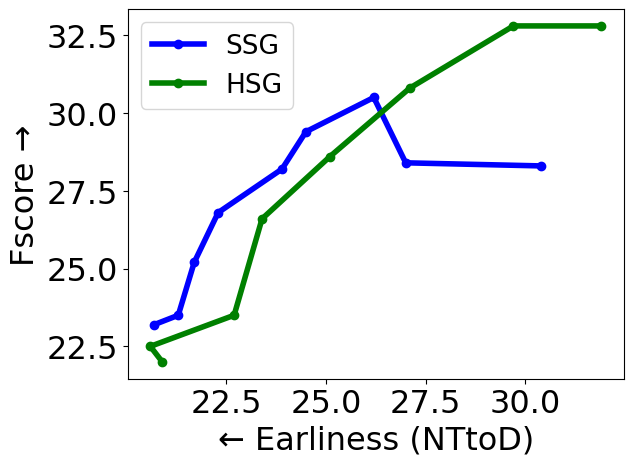

In [34]:
# création de la figure
plt.figure()
plt.rcParams.update({'font.size': 23})
# set the line width of plot higher
plt.rcParams['lines.linewidth'] = 4

deltaIoU = 0.8
# ajout légendes des axes
plt.xlabel("← Earliness (NTtoD)")
plt.ylabel("Fscore →")

# nttod_list, fscore_list = getFScoreAndNTtoDoFor(doSSG=False, useSG=False)
# ax.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="CTC",  color='blue')

# ntto_d__fscore = getFScoreAndNTtoDoFor(True,True)
# ntto_d__fscore = sorted(ntto_d__fscore, key=lambda x: x[0][0])
# nttod_list, fscore_list = ntto_d__fscore
# plt.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="SSG",  color='orange')
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,deltaIoU=deltaIoU)[2:]
# ntto_d__fscore = sorted(zip(ntto_d, fscore), key=lambda x: x[0][0])
plt.plot(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list)), label="SSG",  color='blue',marker="o")
# plt.errorbar(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1],nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3],nttod_fscore_list)), linestyle='None')

# nttod_list, fscore_list = getFScoreAndNTtoDoFor(doSSG=False, useSG=True)
# plt.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="HSG",  color='green')
nttod_fscore_list = getFScoreAndNTtoDoFor(False, True,deltaIoU=deltaIoU)[3:]
# ntto_d__fscore = sorted(zip(ntto_d, fscore), key=lambda x: x[0][0])
plt.plot(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list)), label="HSG",  color='green',marker="o")
# plt.errorbar(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1],nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3],nttod_fscore_list)), linestyle='None')


# nttod_fscore_list = getFScoreAndNTtoDoFor(True, False,wCTC=1,smooth=0,deltaIoU=0.8,onlyConverged=True)
# plt.plot(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list)), label="CTC",  color='red')
# plt.errorbar(list(map(lambda nt_std:nt_std[0],nttod_fscore_list)), list(map(lambda fs_std:fs_std[2],nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1],nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3],nttod_fscore_list)), linestyle='None')

# ajout de la légende
plt.legend(fontsize=19)

# affichage de la figure
# plt.show()
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_Fscore08.png", format="png",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_Fscore08.eps", format="eps",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_Fscore08.pdf", format="pdf",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_Fscore08.svg", format="svg",bbox_inches='tight')

# Comparaison des représentations

In [16]:
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,vox=1,cudi="1e-10",split=700)
print("Vox=1, Cudi=1e-10, Split=700")
prettyPrintForLatexIntegration(nttod_fscore_list[0])
print("Vox=1, Cudi=3, Split=200")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,vox=1,cudi=3)
prettyPrintForLatexIntegration(nttod_fscore_list[0])
print("Vox=2, Cudi=3, Split=200")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,vox=2,cudi=3)
prettyPrintForLatexIntegration(nttod_fscore_list[0])
print("Vox=3, Cudi=3, Split=200")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,vox=3,cudi=3)
prettyPrintForLatexIntegration(nttod_fscore_list[0])
print("Vox=4, Cudi=3, Split=200")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,vox=4,cudi=3)
prettyPrintForLatexIntegration(nttod_fscore_list[1])
print("Vox=6, Cudi=3, Split=200")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,vox=6,cudi=3)
prettyPrintForLatexIntegration(nttod_fscore_list[0])
print("Vox=7, Cudi=3, Split=200")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,vox=7,cudi=3)
prettyPrintForLatexIntegration(nttod_fscore_list[0])

Vox=1, Cudi=1e-10, Split=700


ValueError: too many values to unpack (expected 4)

# Comparaison des Losses

In [ ]:
print("Only CTC, no smooth, no per frame")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,wCTC=1,smooth=0)
prettyPrintForLatexIntegration(nttod_fscore_list)
print("CTC + smooth, no per frame")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,wCTC=1,smooth=10)
prettyPrintForLatexIntegration(nttod_fscore_list)
print("CTC + smooth+ per frame")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True)
prettyPrintForLatexIntegration(nttod_fscore_list[1])
print("no CTC, smooth+ per frame")
nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,wCTC=0,smooth=0.5)
prettyPrintForLatexIntegration(nttod_fscore_list)
# print("no CTC, no smooth, per frame")
# nttod_fscore_list = getFScoreAndNTtoDoFor(True, True,wCTC=0,smooth=0)
# prettyPrintForLatexIntegration(nttod_fscore_list)
print("Normal CTC")
nttod_fscore_list = getFScoreAndNTtoDoFor(doSSG=True, useSG=False,wCTC=1,smooth=0)
prettyPrintForLatexIntegration(nttod_fscore_list)


# Evolution of Earliness and Fscore with the weightPrior variation

In [ ]:
iou = 0.0
nttod_fscore_list_SGG = getFScoreAndNTtoDoFor(doSSG=True,useSG= True,deltaIoU=iou)
nttod_fscore_list_HGG = getFScoreAndNTtoDoFor(doSSG=False, useSG=True,deltaIoU=iou)
nttod_fscore_list_CTC = getFScoreAndNTtoDoFor(doSSG=True,useSG=False, wCTC=1,smooth=0,onlyConverged=True,deltaIoU=iou) # doSSG is True, but is not used when useSG is False


In [ ]:
from matplotlib import markers
plt.rcParams.update({'font.size': 23})
# set the line width of plot higher
plt.rcParams['lines.linewidth'] = 4
# plot the evolution of the Fscore with the weightPrior, nttod_fscore_list_HGG is the list ordered by weightPrior (from 0 to 1), use it as absciss
plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list_SGG)), label="SSG",  color='blue',marker="o")
plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1][1:2], [nttod_fscore_list_SGG[1][2]*100-1],  color='black',marker=markers.CARETUP, markersize=10)
plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list_HGG)), label="HSG",  color='green',marker="o")
resCTC = list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list_CTC))
plt.plot([0,0.1,0.2 ,0.3,0.9,1],resCTC[:4]+resCTC[9:] , label="CTC",  color='red',marker="o")
plt.xlabel("Weight Label Prior (Ψ)")
plt.ylabel("Fscore →")
# plt.ylim(0,90)
plt.axvline(x=0.1, color='black', linestyle='dotted',linewidth=2, ymin=0.0,ymax=0.93)

plt.xticks([0,0.2,0.4,0.6,0.8,1])
#legend top right
plt.legend(loc='upper right',fontsize=19)
#error bars
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2],nttod_fscore_list_SGG)), yerr=list(map(lambda fs_std:fs_std[3],nttod_fscore_list_SGG)), color='blue')
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2],nttod_fscore_list_HGG)), yerr=list(map(lambda fs_std:fs_std[3],nttod_fscore_list_HGG)), color='green')
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2],nttod_fscore_list_CTC)), yerr=list(map(lambda fs_std:fs_std[3],nttod_fscore_list_CTC)), color='red')

plt.savefig(f"../Illustrations/ScoreGraphics/{db}_Fscore_wprior.png", format="png",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_Fscore_wprior.eps", format="eps",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_Fscore_wprior.pdf", format="pdf",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_Fscore_wprior.svg", format="svg",bbox_inches='tight')

### plot the evolution of the NTtoD with the weightPrior

In [ ]:

plt.rcParams.update({'font.size': 23})
# set the line width of plot higher
plt.rcParams['lines.linewidth'] = 4
plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_SGG)), label="SSG",  color='blue',marker="o")
plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1][1:2],  [nttod_fscore_list_SGG[1][0]*100-0.8],  color='black',marker=markers.CARETUP, markersize=10)
plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_HGG)), label="HSG",  color='green',marker="o")
resCTC = list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_CTC))
plt.plot([0,0.1,0.2 ,0.3,0.9,1],resCTC[:4]+resCTC[9:] , label="CTC",  color='red',marker="o")
# plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1][:3], list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_CTC[:3])), label="CTC",  color='red',marker="o")
# draw a vertical line at x=0.1 that is the same height as nttod_fscore_list_SGG[1][0]
plt.axvline(x=0.1, color='black', linestyle='dotted',linewidth=2, ymin=0.0,ymax=0.29)

plt.xlabel("Weight Label Prior (Ψ)")
plt.ylabel("← Earliness (NTtoD)")
plt.xticks([0,0.2,0.4,0.6,0.8,1])
plt.yticks([20,40,60,80])

#legend
plt.legend(fontsize=19)
#error bars
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0],nttod_fscore_list_SGG)), yerr=list(map(lambda fs_std:fs_std[1],nttod_fscore_list_SGG)), color='blue')
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0],nttod_fscore_list_HGG)), yerr=list(map(lambda fs_std:fs_std[1],nttod_fscore_list_HGG)), color='green')
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0],nttod_fscore_list_CTC)), yerr=list(map(lambda fs_std:fs_std[1],nttod_fscore_list_CTC)), color='red')

plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_wprior.png", format="png",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_wprior.eps", format="eps",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_wprior.pdf", format="pdf",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_wprior.svg", format="svg",bbox_inches='tight')

In [ ]:
def extractForJCRNN():
    pathRes = f"C:\workspace2/Datasets/{db}/expOutSMMTVariation/"
    allRes = []
    for fold in os.listdir(pathRes):
        pathResultBOD = pathRes+fold+"/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt"
        # read and scores fscore result
        fscore = -1
        stdDev = -1
        NTtoD = -1
        stdDevNTtoD = -1
        with open(pathResultBOD, 'r') as f:
            for line in f:
                if "FScore:" in line:
                    # format is Fscore : 0.0 +- 0.0
                    fscore = float(line.split(":")[1].split("+-")[0])
                    stdDev = float(line.split(":")[1].split("+-")[1])

        # read and scores NTtoD result
                if "NTtoD:" in line:
                    # format is NTtoD : 0.0 +- 0.0
                    NTtoD = float(line.split(":")[1].split("+-")[0])
                    stdDevNTtoD = float(line.split(":")[1].split("+-")[1])

        allRes.append([NTtoD,stdDevNTtoD,fscore,stdDev])
    return allRes


In [ ]:
listeResJCRNN = extractForJCRNN()

In [ ]:
listeResJCRNN

In [ ]:
plt.figure()

plt.xlabel("Earliness (NTtoD)")

plt.ylabel("Fscore")
#sort by nttod
listeResJCRNN.sort(key=lambda x:x[0])

#get the convex upper values
# listeResJCRNN = list(map(lambda x: [x[0],x[1],x[2],x[3]],listeResJCRNN))
# for i in range(1,len(listeResJCRNN)):
#     if listeResJCRNN[i][2] < listeResJCRNN[i-1][2]:
#         listeResJCRNN[i][2] = listeResJCRNN[i-1][2]
#         listeResJCRNN[i][3] = listeResJCRNN[i-1][3]



plt.plot(list(map(lambda nt_std:nt_std[0]*100,listeResJCRNN)),list(map(lambda nt_std:nt_std[2]*100,listeResJCRNN)),marker="o",color="blue",label="JCRNN")

In [ ]:
plt.figure()

plt.xlabel("← Earliness (NTtoD)")

plt.ylabel("Fscore →")
listeResJCRNN_M = extractForJCRNN()
#sort by nttod
listeResJCRNN_M.sort(key=lambda x:x[0])

#remove the couples under the convex upper
listeResJCRNN_M = list(map(lambda x: [x[0],x[1],x[2],x[3]],listeResJCRNN_M))
toRemove = []
for i in range(1,len(listeResJCRNN_M)):
    if listeResJCRNN_M[i][2] < listeResJCRNN_M[i-1][2]:
        toRemove.append(i)

for i in range(len(toRemove)):
    del listeResJCRNN_M[toRemove[i]-i]


print(listeResJCRNN_M)

plt.plot(list(map(lambda nt_std:nt_std[0]*100,listeResJCRNN_M)),list(map(lambda nt_std:nt_std[2]*100,listeResJCRNN_M)),marker="o",color="blue",label="JCRNN")


In [ ]:
# plot together the two curves (JCRNN and SSG)
plt.figure()

plt.xlabel("← Earliness (NTtoD)")
plt.ylabel("Fscore →")

plt.plot(list(map(lambda nt_std:nt_std[0]*100,listeResJCRNN_M)),list(map(lambda nt_std:nt_std[2]*100,listeResJCRNN_M)),marker="o",color="red",label="SM-MT")
# plt.errorbar(list(map(lambda nt_std:nt_std[0]*100,listeResJCRNN_M)), list(map(lambda fs_std:fs_std[2]*100,listeResJCRNN_M)), xerr=list(map(lambda nt_std:nt_std[1]*100,listeResJCRNN_M)), yerr= list(map(lambda fs_std:fs_std[3]*100,listeResJCRNN_M)), linestyle='-',color='red',ecolor='red',capsize=5,elinewidth=1,markeredgewidth=1)

listeResSSG = getFScoreAndNTtoDoFor(True, True)[1:]
# ntto_d__fscore = sorted(zip(ntto_d, fscore), key=lambda x: x[0][0])
plt.plot(list(map(lambda nt_std:nt_std[0]*100,listeResSSG)),list(map(lambda nt_std:nt_std[2]*100,listeResSSG)),marker="o",color="blue",label="Ours")
# plt.errorbar(list(map(lambda nt_std:nt_std[0]*100,listeResSSG)), list(map(lambda fs_std:fs_std[2]*100,listeResSSG)), xerr=list(map(lambda nt_std:nt_std[1]*100,listeResSSG)), yerr= list(map(lambda fs_std:fs_std[3]*100,listeResSSG)), linestyle='-',color='blue',ecolor='blue',capsize=5,elinewidth=1,markeredgewidth=1)

plt.legend()
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_Fscore_SM-MT_vs_ours.png", format="png",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_Fscore_SM-MT_vs_ours.eps", format="eps",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_Fscore_SM-MT_vs_ours.pdf", format="pdf",bbox_inches='tight')

In [ ]:
def getFScorePerClassAndNTtoDoFor():
    doSSG = True
    useSG = True
    wCTC=0.9
    smooth=10
    deltaIoU=0.0
    vox=4
    cudi=3
    split=200
    onlyConverged=False
    nttod_fscore_list = []
   # parcours des fichiers
    for x in range(0, 11):
        # construction du nom de fichier
        onlyConvergedStr = "_convergedOnly" if onlyConverged else ""
        filename = f"vox{str(vox)}_cuDi{cudi}_wCTC{wCTC}_smooth{str(smooth)}_SSG{str(doSSG)}_wprior{x / 10.0:.1f}_useSG{str(useSG)}_split{str(split)}{onlyConvergedStr}/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_{str(deltaIoU)}.txt"

        if onlyConverged and not os.path.exists(path+filename):
            filename = f"vox{str(vox)}_cuDi{cudi}_wCTC{wCTC}_smooth{str(smooth)}_SSG{str(doSSG)}_wprior{x / 10.0:.1f}_useSG{str(useSG)}_split{str(split)}/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_{str(deltaIoU)}.txt"
            print("Only converged does not exist for wprior",x," used normal one")
        # vérification si le fichier existe
        if os.path.exists(path+filename):
            # ouverture du fichier en mode lecture
            with open(path+filename, "r") as f:
                # parcours des lignes
                for line in f:
                    # recherche des scores Fscore et NTtoD
                    if "FScore" in line and "per class:" in line:
                        vals = line.split(":")[1]
                        vals = vals.split(";")[1:]
                        fscores = list(map(float,vals))
                    elif "NTtoD" in line and "per class:" in line:
                        vals = line.split(":")[1]
                        vals = vals.split(";")[1:]
                        nttods = list(map(float,vals))
                # ajout des coordonnées à la liste correspondante
                nttod_fscore_list.append((fscores,nttods))
        else:
            # print(f"Le fichier {filename} n'existe pas.")
            pass
    return nttod_fscore_list

In [ ]:
fscores_nttods =  getFScorePerClassAndNTtoDoFor()

In [ ]:
print(fscores_nttods[1])

In [ ]:
# plot two bar diagrams (fscore and NTtoD) for each class
fscoresNTTOd01 = fscores_nttods[1]
plt.figure()
plt.xlabel("Class label")
plt.ylabel("Fscore →")
plt.bar(range(1,len(fscoresNTTOd01[0])+1),[i*100 for i in fscoresNTTOd01[0]])

# show only from 1 to 20
plt.xlim(0.5,20.5)
# save
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_Fscore_per_class.png", format="png",bbox_inches='tight')
# plt.savefig(f"../Illustrations/ScoreGraphics/{db}_Fscore_per_class.eps", format="eps",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_Fscore_per_class.pdf", format="pdf",bbox_inches='tight')


In [ ]:
plt.figure()
plt.xlabel("Class label")
plt.ylabel("← NTtoD")
plt.bar(range(1,len(fscoresNTTOd01[1])+1),[i*100 for i in fscoresNTTOd01[1]])
plt.xlim(0.5,20.5)
# save
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_per_class.png", format="png",bbox_inches='tight')
# plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_per_class.eps", format="eps",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_per_class.pdf", format="pdf",bbox_inches='tight')